In [1]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

In [2]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [3]:
# We only care about the country sequence
file = open("C:/Users/15311/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())
# population
file = open("C:/Users/15311/Desktop/new_results/Total_pop_newest.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

In [4]:
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

file = open("../2_Concentration_Factors/final_demand.json", "r")
final_demand = file.read()
final_demand = json.loads(final_demand)

In [5]:
# per million USD
# EORA is in 1000 USD
for i in Countries:
    total_output[i] = total_output[i] * 1000 
    final_demand[i] = final_demand[i] * 1000 

In [6]:
final_demand['USA']/(10**13)

1.9592997213328263

In [7]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [8]:
# total number of deaths caused by country i and happen in country j
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

In [9]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [10]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))
pro_caused = dict(pd.DataFrame(pro_mort_tol).sum(axis = 0))

In [11]:
# total deaths happen in that country
con_dom_world = {}
for country in con_mort_tol:
    con_dom_world[country] = {}
    con_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_dom_world[country]['world'] = con_total[country]
    con_dom_world[country]['OtherPartofWorld'] = con_dom_world[country]['world'] - con_dom_world[country]['domestic']

In [12]:
# total deaths caused by that country
con_cause_dom_world = {}
for country in con_mort_tol:
    con_cause_dom_world[country] = {}
    con_cause_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_cause_dom_world[country]['world'] = con_caused[country]
    con_cause_dom_world[country]['OtherPartofWorld'] = con_cause_dom_world[country]['world'] - con_cause_dom_world[country]['domestic']

In [13]:
net_export_death = {}

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_death[country] = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])

In [14]:
print(sorted(con_total.items(), key=lambda item: item[1],reverse=True)[:6])
print(sorted(con_caused.items(), key=lambda item: item[1],reverse=True)[:5])

[('CHN', 1241848.475484423), ('IND', 576492.7342931574), ('IDN', 169699.42867745517), ('JPN', 106707.94366040881), ('BRA', 92051.51869995154), ('USA', 86781.66618595831)]
[('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584)]


In [15]:
net_export_death_per = {} # per population

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_val = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])/(population[country]/10000)
        if net_export_val > 100:
            net_export_death_per[country] = 100
#         elif net_export_val > 100000:
#             net_export_death_per[country] = 100000
        else:
            net_export_death_per[country] = net_export_val

In [16]:
population.pop('ROW')
final_demand.pop('ROW')

0.0

In [17]:
df_shp = gpd.read_file('C:/Users/15311/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [18]:
df_shp.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [19]:
df_new = pd.DataFrame({'ADM0_A3': list(net_export_death.keys()),'net_export': list(net_export_death.values()),
                      'population': list(population.values()),'final_demand': list(final_demand.values()),})

In [20]:
df_final = pd.merge(df_new,df_shp,how="left",on=["ADM0_A3"])

In [21]:
df_final = df_final[['ADM0_A3','NAME','net_export','population','final_demand','CONTINENT']]

In [22]:
for i in range(len(df_final)):
    if df_final.loc[i,'ADM0_A3'] == 'PSE':
        df_final.loc[i,'CONTINENT'] == df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT']

In [23]:
df_final.loc[list(net_export_death.keys()).index('PSE'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT'].values[0]

In [24]:
df_final.loc[list(net_export_death.keys()).index('SUD'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='SDN']['CONTINENT'].values[0]

In [25]:
df_final['CONTINENT']=pd.Categorical(df_final['CONTINENT'])

In [26]:
df_final['CONTINENT_code'] = df_final['CONTINENT'].cat.codes

In [27]:
continent = ['Africa','Asia','Europe','North America','Oceania','Seven seas (open ocean)','South America']

In [28]:
continent2 = {'0':'Africa','1':'Asia','2':'Europe','3':'North America','4':'Oceania','6':'Seven seas (open ocean)','5':'South America'}

In [29]:
df_final[df_final['CONTINENT']=='Seven seas (open ocean)']

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code
105,MDV,Maldives,201.251746,5.909558e+05,3.374815e+09,Seven seas (open ocean),5
109,MUS,Mauritius,360.984105,1.291254e+06,1.115682e+10,Seven seas (open ocean),5
148,SYC,Seychelles,174.947647,1.051095e+05,1.362116e+09,Seven seas (open ocean),5


In [30]:
# Change seven seas to other
df_final['CONTINENT'] = df_final['CONTINENT'].replace(['Seven seas (open ocean)'], 'Other')

In [31]:
df_final['CONTINENT'].unique()

[Asia, Europe, Africa, North America, South America, Oceania, Other]
Categories (7, object): [Asia, Europe, Africa, North America, South America, Oceania, Other]

In [32]:
df_final['net_export_capita'] = df_final['net_export']/df_final['population']

In [33]:
df_final

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita
0,AFG,Afghanistan,437.294550,3.056780e+07,2.447052e+10,Asia,1,0.000014
1,ALB,Albania,-94.854957,2.895460e+06,1.346807e+10,Europe,2,-0.000033
2,DZA,Algeria,3023.901587,4.414247e+07,1.833768e+11,Africa,0,0.000069
3,AND,Andorra,42.552640,1.084263e+05,2.857466e+09,Europe,2,0.000392
4,AGO,Angola,-2665.487484,3.676776e+07,9.788361e+10,Africa,0,-0.000072
...,...,...,...,...,...,...,...,...
182,VEN,Venezuela,14588.784775,3.229033e+07,3.873810e+11,South America,6,0.000452
183,VNM,Vietnam,-21990.234198,9.895143e+07,1.995281e+11,Asia,1,-0.000222
184,YEM,Yemen,-156.568027,3.042738e+07,3.166482e+10,Asia,1,-0.000005
185,ZMB,Zambia,188.927469,1.861695e+07,2.202121e+10,Africa,0,0.000010


In [37]:
df_final.loc[30,'NAME'] = 'Palestine'

In [38]:
df_final.to_csv('map_continent.csv')

In [39]:
for continent in list(df_final['CONTINENT'].unique()):
    df_continent = df_final[df_final['CONTINENT'] == continent]
    total_number = len(df_continent)
    negative = len(df_continent[df_continent['net_export'] < 0])
    positive = len(df_continent[df_continent['net_export'] >= 0])
    print(continent,'negative',negative/total_number,'positive',positive/total_number)

Asia negative 0.3673469387755102 positive 0.6326530612244898
Europe negative 0.2558139534883721 positive 0.7441860465116279
Africa negative 0.5102040816326531 positive 0.4897959183673469
North America negative 0.2608695652173913 positive 0.7391304347826086
South America negative 0.4166666666666667 positive 0.5833333333333334
Oceania negative 0.0 positive 1.0
Other negative 0.0 positive 1.0


In [40]:
len(df_final[df_final['net_export']>=0])/len(df_final)

0.6524064171122995

In [41]:
empires = ['GBR','FRA','BEL','NLD','ITA','JPN','PRT','RUS','ESP','USA']
GBR_colonies = ['SWZ','LSO','ZWE','ZMB','MWI','TZA','UGA','KEN','TZA','SOM','MOZ','BWA','SUD','BHR','JOR','KWT',
'QAT','ARE','YEM','MDV','SYC','MUS','PAK','BGD','MMR','BRN','MUS','GMB','SLE','GHA','NGA','IND',
'LKA','MYS','MYS','SGP','HKG','FJI','VUT','BHS','BRB','GUY','BLZ','JAM','TTO','CYP','MLT','ATG']
FRA_colonies = ['MAR','DZA','TUN','SYR','LBN','MRT','MLI','NER','TCD','CAF','DJI','BEN','TGO',
'BFA','SEN','GIN','CIV','GAB','COG','CMR', 'MDG','LAO','KHM','VNM']
BEL_colonies = ['COD','RWA','BDI']
NLD_colonies = ['SUR','IDN']
ITA_colonies = ['LBY','ERI','SOM']
JPN_colonies = ['KOR','PRK','TWN']
PRT_colonies = ['CPV','AGO','IND','MAC']
RUS_colonies = ['EST','LVA','LTU','UKR','KAZ','MDA','GEO','ARM','AZE','TKM','UZB','KGZ','TJK']
ESP_colonies = ['MAR','MRT']
USA_colonies = ['PHL']
empire_colonies = {'GBR':list(set(GBR_colonies)),
                   'FRA':list(set(FRA_colonies)),
                   'BEL':list(set(BEL_colonies)),
                   'NLD':list(set(NLD_colonies)),
                   'ITA':list(set(ITA_colonies)),
                   'JPN':list(set(JPN_colonies)),
                   'PRT':list(set(PRT_colonies)),
                   'RUS':list(set(RUS_colonies)),
                   'ESP':list(set(ESP_colonies)),
                   'USA':list(set(USA_colonies))  
                  }

In [42]:
df_final['Colony'] = 'Z_Other'
for key in empire_colonies:
    colonizer_index = df_final[df_final['ADM0_A3'] == key].index
    df_final.loc[colonizer_index,'Colony'] = 'A_Colonizer'
    colony_index = df_final[df_final['ADM0_A3'].isin(empire_colonies[key])].index
    df_final.loc[colony_index,'Colony'] = str(key)+'_colony'

In [43]:
df_final['Colony']=pd.Categorical(df_final['Colony'])
df_final['Colony_code'] = df_final['Colony'].cat.codes
colony_dict = dict(enumerate(df_final['Colony'].cat.categories))

In [45]:
df_final

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita,Colony,Colony_code
0,AFG,Afghanistan,437.294550,3.056780e+07,2.447052e+10,Asia,1,0.000014,Z_Other,11
1,ALB,Albania,-94.854957,2.895460e+06,1.346807e+10,Europe,2,-0.000033,Z_Other,11
2,DZA,Algeria,3023.901587,4.414247e+07,1.833768e+11,Africa,0,0.000069,FRA_colony,3
3,AND,Andorra,42.552640,1.084263e+05,2.857466e+09,Europe,2,0.000392,Z_Other,11
4,AGO,Angola,-2665.487484,3.676776e+07,9.788361e+10,Africa,0,-0.000072,PRT_colony,8
...,...,...,...,...,...,...,...,...,...,...
182,VEN,Venezuela,14588.784775,3.229033e+07,3.873810e+11,South America,6,0.000452,Z_Other,11
183,VNM,Vietnam,-21990.234198,9.895143e+07,1.995281e+11,Asia,1,-0.000222,FRA_colony,3
184,YEM,Yemen,-156.568027,3.042738e+07,3.166482e+10,Asia,1,-0.000005,GBR_colony,4
185,ZMB,Zambia,188.927469,1.861695e+07,2.202121e+10,Africa,0,0.000010,GBR_colony,4


In [46]:
df_final.to_csv('map_continent_colony.csv')

In [103]:
colony_dict[0] = 'Colonizer'
colony_dict[11] = 'Other'
colony_dict

{0: 'Colonizer',
 1: 'BEL_colony',
 2: 'ESP_colony',
 3: 'FRA_colony',
 4: 'GBR_colony',
 5: 'ITA_colony',
 6: 'JPN_colony',
 7: 'NLD_colony',
 8: 'PRT_colony',
 9: 'RUS_colony',
 10: 'USA_colony',
 11: 'Other'}

-----

## Overall plot

Text(0.5, 0, 'log(Final demand per capita(dollars))')

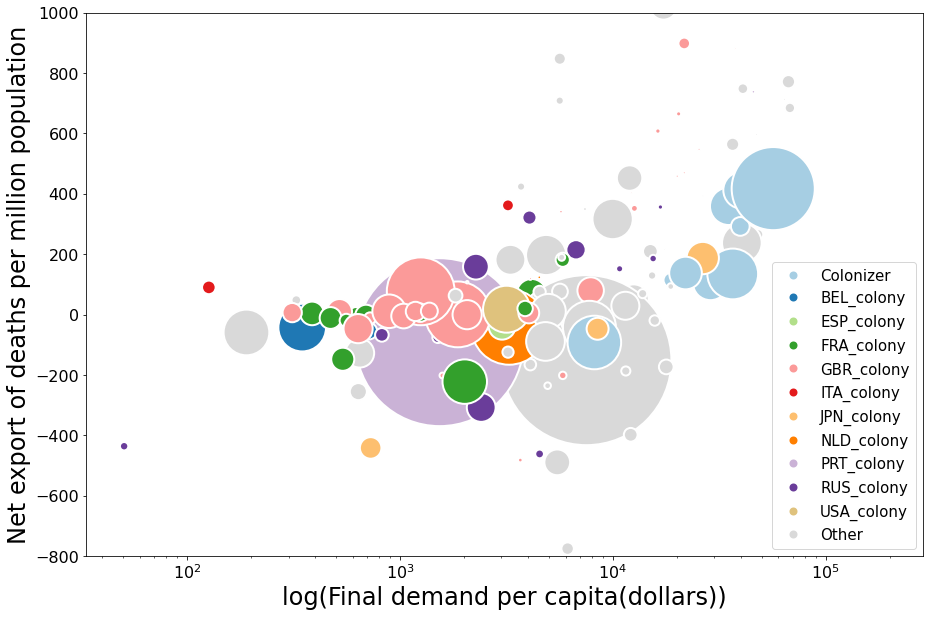

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final['final_demand']/df_final['population'], 
    y = df_final['net_export']/(df_final['population']/1000000), 
    s=df_final['population']/50000, 
    c=df_final['Colony'].cat.codes, 
    cmap=ListedColormap(["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#dfc27d","#d9d9d9"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-800,1000)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")

# plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
# plt.legend(loc="upper left",fontsize=17)

plt.legend(handles=scatter.legend_elements(num=None)[0], labels=colony_dict.values(),fontsize=15)

  
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")